# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Processing

In [2]:
#Reading the file.

In [3]:
df=pd.read_csv(r"C:\Users\USER\Downloads\coffee.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [5]:
df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000
mean,127.267635,128.847034,125.784669,127.215567,8807.178907
std,50.569425,51.164948,49.851487,50.506519,9612.789034
min,41.500000,42.000000,41.500000,41.500000,0.000000
25%,98.800000,100.112500,97.862500,98.650000,61.000000
50%,120.400000,121.600000,118.950000,120.250000,7008.000000
75%,144.800000,146.000000,143.000000,144.337500,14497.750000
max,305.300000,306.250000,304.000000,304.900000,62045.000000


In [7]:
#check data type

In [8]:
type(df["Date"].iloc[0])

str

In [9]:
#drop coloumns

In [10]:
df=df.drop(["Currency"],axis=1)

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-03,122.25,124.00,116.10,116.50,6640
1,2000-01-04,116.25,120.50,115.75,116.25,5492
2,2000-01-05,115.00,121.00,115.00,118.60,6165
3,2000-01-06,119.00,121.40,116.50,116.85,5094
4,2000-01-07,117.25,117.75,113.80,114.15,6855


# Perform EDA

<AxesSubplot:>

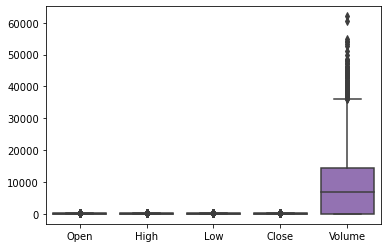

In [12]:
sns.boxplot(data=df)

In [13]:
df["Volume"].value_counts()

0        205
2         78
1         55
6         48
4         48
        ... 
13666      1
10291      1
10143      1
10318      1
10077      1
Name: Volume, Length: 3712, dtype: int64

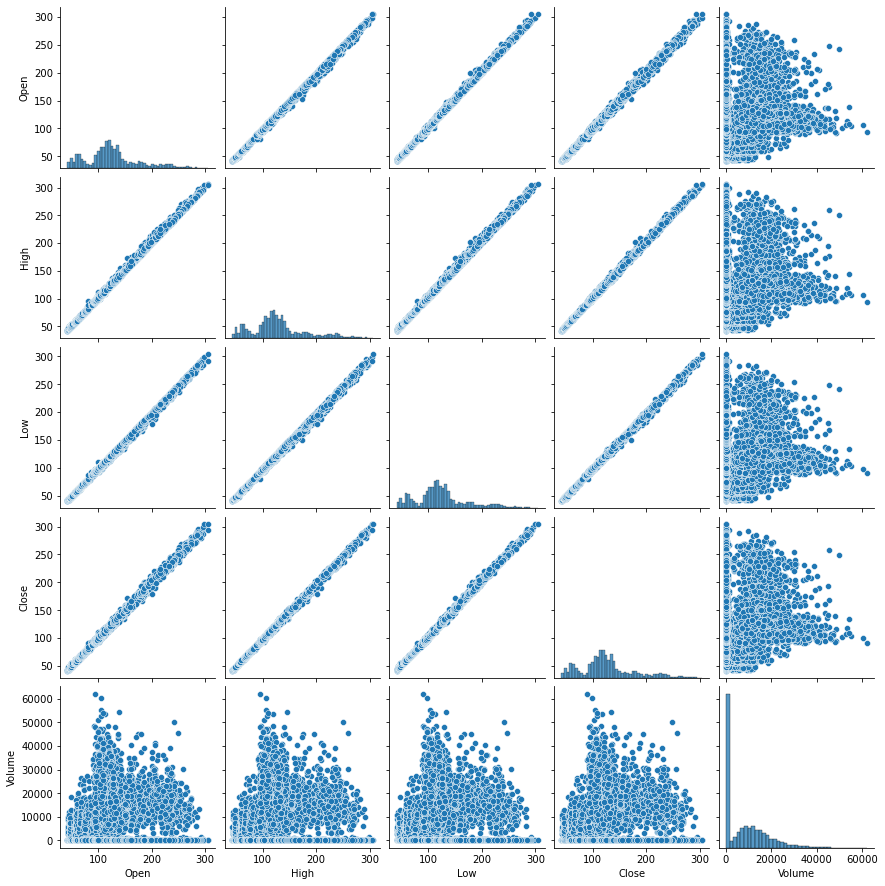

In [14]:
sns.pairplot(data=df)

<AxesSubplot:>

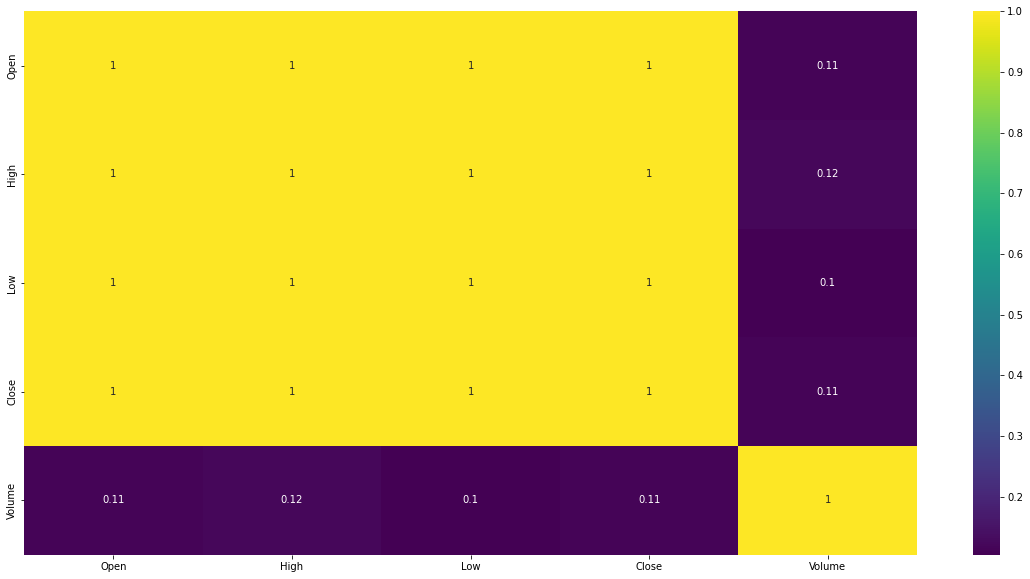

In [15]:
#Finding corelation between columns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

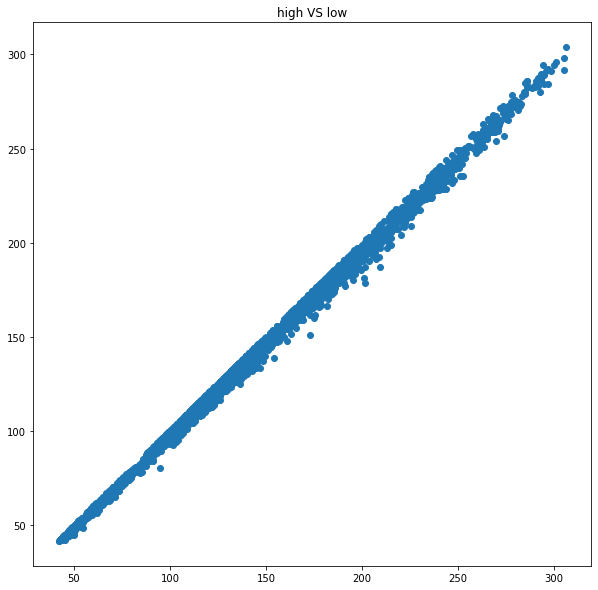

In [16]:
plt.figure(figsize = (10, 10))
plt.title('high VS low')
plt.scatter(df['High'], df['Low'])




# Perform machine learning

In [17]:
#Predict **Close** values using linear regression 0
#target column(Close)


In [18]:
from sklearn import linear_model

In [19]:
slr=linear_model.LinearRegression()

In [20]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [21]:
X=df[['Open', 'High', 'Low','Volume']]
y=df['Close']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [24]:
slr.fit(X_train,y_train)

LinearRegression()

In [25]:
#predictions
predictions=slr.predict(X_test)

In [26]:
accuracy=slr.score(X_test,y_test)

In [27]:

print(accuracy) #0.99% accuracy 

0.9994763229642112


In [ ]:
Scatter plot of predictions vs y_test

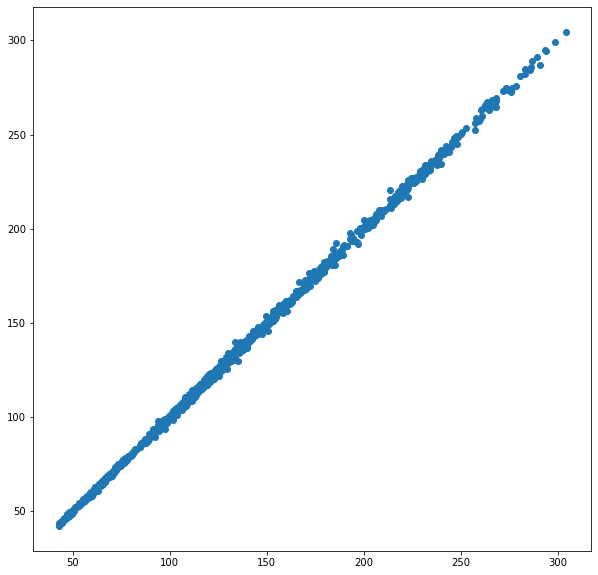

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(predictions,y_test)

# Finding Errors 

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
mean_absolute_error(y_test,predictions)

0.7992722349766603

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

1.3583852491744348

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9994763229642112